<a href="https://colab.research.google.com/github/pds2021/a5-T1mbo96/blob/assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Practical Data Science 20/21*
# Programming Assignment 5 - Create your own App

In this programming assignment you'll build a model that serves as a foundation for your own app. To this end, you will create your own dataset, build a deep learning model on this data, and deploy it!

In [2]:
#!pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 194kB 15.3MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 


In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import pandas as pd
import csv

__Google Drive integration__

If you want to store and access your downloaded data for this assignment you can use the following code:

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/My\ Drive/pds_a5
%cd /content/drive/My\ Drive/pds_a5

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/My Drive/pds_a5’: File exists
/content/drive/My Drive/pds_a5


## Develop an Application Idea

___Free your mind - this part is totally up to you.___

Think of an app that you'd like to build.
*   What useful app have you been missing?
*   Do you have any hobbies an app could be helpful for?
*   Is this a suitable classification or regression task? 
*   How could you get the data?


In [4]:
# Write down your app idea here
# Differentiate between different means of transportation (Car, Bicycle, Motorcycle, Boat, Plane, Train, Helicopter, Scooter, Truck, Bus).
# I got all my data from flickr. There are better pictures and it's easier and faster 
# (at least for me) to get them via console.
# Just search for an keyword and check if all images are good to work with. 
# Then open browser console and get all elements by class name 'photo-list-photo-view'.
# Get the style 'background-image' of the elements (url("...")).
# Split the 'url("' and '")' parts to get the actual url.
# Save all urls in txt-file (because firefox only allows to copy as array representation).
# Add 'https:' (thanks to colab or fastai or python...) to the urls with pycharm or 
# something else (find and replace) and remove the string quotation marks and the commas.
# Convert the txt-file to csv-file and upload it.

You can get an inspiration from these Apps:

<table>
<tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/5.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/400">Guitar Classifier</a> by Christian Werner</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/6.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/340">Healthy or Not!</a> by Nikhil Utane </td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/7.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/333">Hummingbird Classifier</a> by Nissan Dookeran</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/8.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/409">Edible Mushroom?</a> by Ramon</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/9.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/387">Cousin Recognizer</a> by Charlie Harrington</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/10.png"><br> <a href="https://forums.fast.ai/t/share-your-work-here/27676/386">Emotion Classifier</a> by Ethan Sutin and Team 26</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/11.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/350">American Sign Language</a> by Keyur Paralkar</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/12.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/355">Your City from Space</a> by Henri Palacci</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/13.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/367">Univariate TS as images using Gramian Angular Field</a> by Ignacio Oguiza</td>
</tr><tr>
<td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/14.png"> <br><a href="https://forums.fast.ai/t/share-your-work-here/27676/348">Face Expression Recognition</a> by Pierre Guillou</td><td> <img src="https://github.com/hiromis/notes/raw/master/lesson3/15.png"><br><a href="https://forums.fast.ai/t/share-your-work-here/27676/352">Tumor-normal sequencing</a> by Alena Harley</td><td>  </td>
</tr><table>

## Creating your own Dataset

Now you need to construct a dataset that allows you to train a model for your app. You learned about how to create a dataset in Lecture 7.

Here, you can follow the steps from the lecture or look into the following ressources:

*   A [tool](https://github.com/toffebjorkskog/ml-tools/blob/master/gi2ds.md) for excluding irrelevant images from Google Image Search results beforehand by @melonkernel
*   See this [post](https://www.christianwerner.net/tech/Build-your-image-dataset-faster/) about an alternative image downloader/cleaner by @cwerner
*   Of course, you can use your own data/images :) 

### 1. Dowload the data 
- You may use the helper functions from the lecture to get the image URLs
- Create a new folder at your defined `path`
- Use `download_image` to download the images into the corresponding (sub-)directories

In [3]:
# File links
url_bicycle = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Bicycle%20CSV.csv'
url_car = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Car%20CSV.csv'
url_motorcycle = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Motorcycle%20CSV.csv'
url_scooter = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Scooter%20CSV.csv'
url_truck = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Truck%20CSV.csv'
url_plane = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Plane%20CSV.csv'
url_train = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Train%20CSV.csv'
url_bus = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Bus%20CSV.csv'
url_boat = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Boat%20CSV.csv'
url_helicopter = 'https://raw.githubusercontent.com/pds2021/a5-T1mbo96/assignment_5/image_links/Helicopter%20CSV.csv'

In [4]:
# Classes
classes = {'Bicycle': url_bicycle,
           'Car': url_car,
           'Motorcycle': url_motorcycle,
           'Scooter': url_scooter,
           'Truck': url_truck,
           'Plane': url_plane,
           'Train': url_train,
           'Bus': url_bus,
           'Boat': url_boat,
           'Helicopter': url_helicopter}

In [5]:
# Download csv files with links to the images
for key, value in classes.items():
  f = key + '.csv'
  download_data(url=value, fname=f)

In [6]:
# Path() to create a destination path
path = Path('data/')

In [7]:
# Create directory for each category and download+save all corresponding images from csv files
for category in classes:
  dest = path/category
  dest.mkdir(parents=True, exist_ok=True)

  with open(category + '.csv', newline='') as f:
    reader = csv.reader(f)
    # Flatten the list of lists
    data = [item for sublist in list(reader) for item in sublist]

  download_images(dest, urls=data)

### 2. Verify Images
- First, create a list of all your images
- Use `verify_images` and `unlink` to remove broken images

In [8]:
# Get path of images
fns = get_image_files(path)
fns

(#3973) [Path('data/Bicycle/00000003.jpg'),Path('data/Bicycle/00000008.jpg'),Path('data/Bicycle/00000000.jpg'),Path('data/Bicycle/00000005.jpg'),Path('data/Bicycle/00000001.jpg'),Path('data/Bicycle/00000002.jpg'),Path('data/Bicycle/00000012.jpg'),Path('data/Bicycle/00000004.jpg'),Path('data/Bicycle/00000006.jpg'),Path('data/Bicycle/00000007.jpg')...]

In [9]:
# Get corrupt images
failed = verify_images(fns)
failed

(#67) [Path('data/Bicycle/00000022.jpg'),Path('data/Bicycle/00000134.jpg'),Path('data/Bicycle/00000181.jpg'),Path('data/Bicycle/00000201.jpg'),Path('data/Bicycle/00000212.jpg'),Path('data/Bicycle/00000221.jpg'),Path('data/Bicycle/00000228.jpg'),Path('data/Bicycle/00000200.jpg'),Path('data/Bicycle/00000267.jpg'),Path('data/Bicycle/00000283.jpg')...]

In [10]:
# Remove corrupt images
failed.map(Path.unlink)

(#67) [None,None,None,None,None,None,None,None,None,None...]

### 3. Create the DataBlock
For this, you need to think of:
- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

Use `RandomResizedCrop` for `item_tfms`with an image size of 224 px, and the appropriate `aug_transforms` as `batch_tfms`.

In [11]:
# Create data block for vehicle images
vehicles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224),
    batch_tfms=aug_transforms())

### 4. Create the DataLoaders

In [12]:
dls = vehicles.dataloaders(path)

### 5. Take a look at some of your pictures. 
Does everything look as expected?

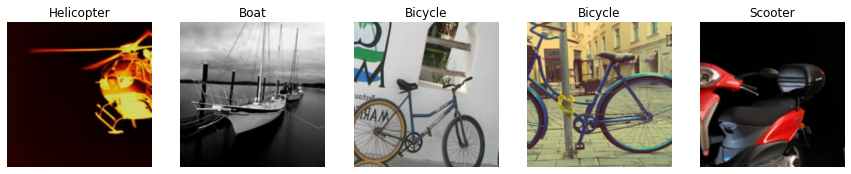

In [14]:
dls.train.show_batch(max_n=5, nrows=1)

## Modeling

### 6. Create a learner

Create an appropriate learner for your data
- Choose an appropriate model [architecture](https://fastai1.fast.ai/vision.models.html)
- Choose appropriate [metrics](https://docs.fast.ai/metrics.html) for your task

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


### 7. Fit the model

Use your knowdledge on model training to fit your model!

In [16]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.320592,0.144702,0.060179,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.544216,0.104338,0.038412,00:19
1,0.477340,0.112200,0.033291,00:19
2,0.421613,0.076547,0.021767,00:19
3,0.351586,0.078744,0.023047,00:20


### 8. Evaluate the model

You' ve already seen many ways to evaluate a model. Evaluate your model in a qualitative and quantitative manner.

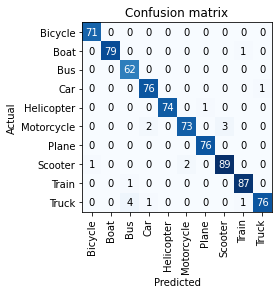

In [17]:
# Quantitative evaluation. The classifier isn't making many mistakes.
# The most mistakes were made between truck and bus.
# It classified the actual truck as a bus.
# Second most mistakes were made between motorcycle and scooter.
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

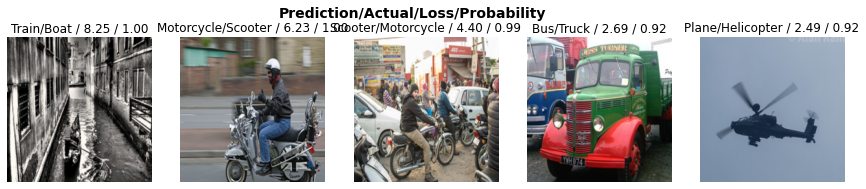

In [18]:
# Qualitative evaluation.
# You can see for example, that the classifier classified a helicopter in the last image as a plane.
# Or the problem with missclassifying motorcycles and scooters.
interp.plot_top_losses(5, nrows=1)

### 9. Clean your data

Based on the evaluation, you may want to clean your data using the `ImageClassifierCleaner`.
- Remeber to delete the selected data after using the cleaner:
    ```python
    for idx in cleaner.delete(): cleaner.fns[idx].unlink()
    ```
    
    
- Once we've cleaned up our data, we can retrain our model. 



In [ ]:
cleaner = ImageClassifierCleaner(learn)
# Currently I'm not able to clean the data because Google Colab always crashes because of too much RAM usage.

## Turning Your Model into an Online Application

Now, take your app into production. You can follow the steps from the lecure:

- Export your model via `learn.export`
- Upload your model to [Github Releases](https://docs.github.com/en/free-pro-team@latest/github/administering-a-repository/about-releases) to make it publicly available at your repository.
- Create and upload a new notebook that only contains the necassary code and IPython widgets for your App. 
    - Remeber to download the exported model from *Github Releases*
    - Include a brief description of your app and the functionalities
- Publish your web app on [Binder](https://mybinder.org/) using Voilà

You can use the [example](https://github.com/pds2021/course/blob/main/nbs/07_Bear_App.ipynb) from the lecture as an orientation.

If you're familiar with the world of web application development, you're free to use these skills and all your tools and ressources!

In [ ]:
# Write your code here

## Finally, Provide a Link to Your App

In [ ]:
# Provide the link to your web app